# Setup

In [1]:
include(joinpath("..","src","setup.jl"))
R"library(ggplot2)"

┌ Info: Recompiling stale cache file /Users/davidlittle/.julia/compiled/v0.7/AxisArrays/zm48T.ji for AxisArrays [39de3d68-74b9-583c-8d2d-e117c070f3a9]
└ @ Base loading.jl:1185
┌ Info: Recompiling stale cache file /Users/davidlittle/.julia/compiled/v0.7/RCall/8GFyb.ji for RCall [6f49c342-dc21-5d91-9882-a32aef131414]
└ @ Base loading.jl:1185
┌ Info: Recompiling stale cache file /Users/davidlittle/.julia/compiled/v0.7/AuditoryBistabilityLE/RqG8S.ji for AuditoryBistabilityLE [7e25a372-ade5-11e8-17af-a30e5a9e2c28]
└ @ Base loading.jl:1185


┌ Info: Recompiling stale cache file /Users/davidlittle/.julia/compiled/v0.7/Feather/RgcL0.ji for Feather [becb17da-46f6-5d3c-ad1b-1c5fe96bc73c]
└ @ Base loading.jl:1185


RObject{StrSxp}
[1] "ggplot2"   "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     


In [2]:
paramfile = joinpath("..","data","count_lengths","run_2018-09-12",
                     "individual_extremes_params.feather")
params = getparams(paramfile) do i,row
  abs(row[:t_c_m] - 32) < 1 &&
  abs(row[:t_c_a] - 5) < 1 &&
  row[:Δf] == 12
end

params[:t_W_m_σ_t] = 7.0
params[:t_W_m_σ_ϕ] = 7.0
params[:t_W_m_c] = 4.0

# just a guess for now, think through this, and the specific inhibition function
# later, if using N works out
params[:W_m_σ_N] = 3

3

# proof of conecpt

In [104]:
result = []
for d in [1,3,6,12]
    @show d
    params[:Δf] = d
    push!(result,bistable_model(15,params,settings,progressbar=false,
                                intermediate_results=true))
end

alert()

d = 1


┌ Info: 19.44% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


d = 3


┌ Info: 4.17% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


d = 6
d = 12


Process(`osascript -e 'display notification "Done!" with title "Julia"'`, ProcessExited(0))

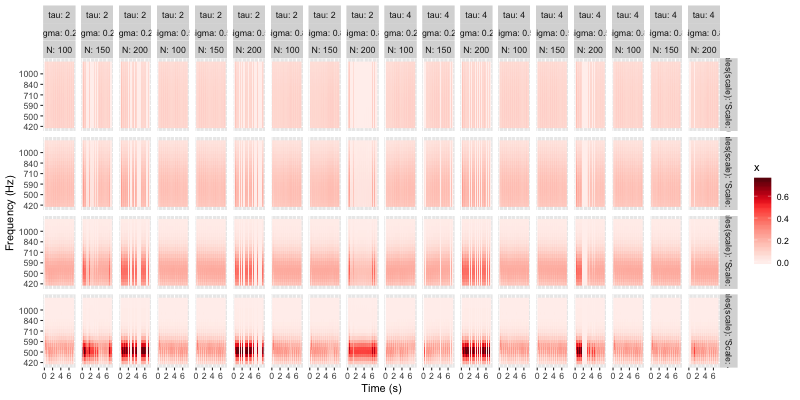

RObject{VecSxp}


In [105]:
rplot(result[1].sources.tracks)

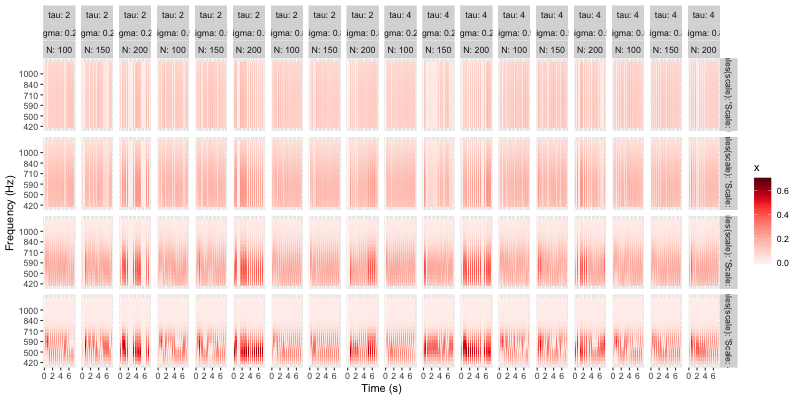

RObject{VecSxp}


In [106]:
rplot(result[2].sources.tracks)

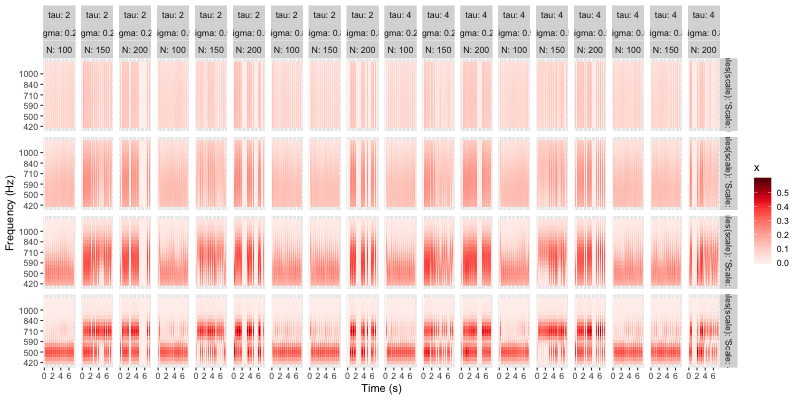

RObject{VecSxp}


In [107]:
rplot(result[3].sources.tracks)

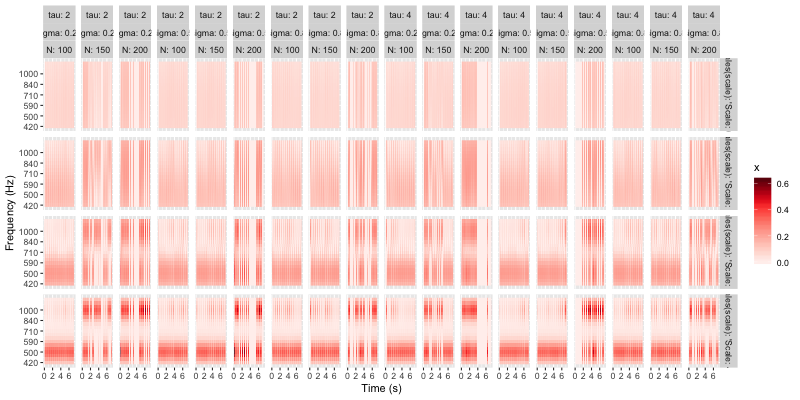

RObject{VecSxp}


In [108]:
rplot(result[4].sources.tracks)

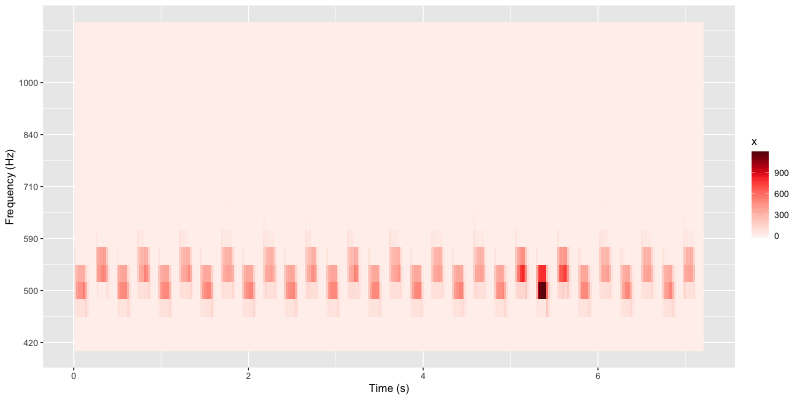

RObject{VecSxp}


In [109]:
rplot(result[1].primary_source)

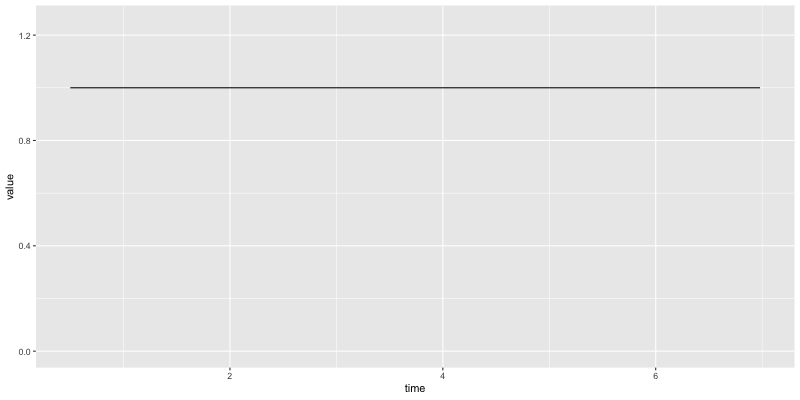

RObject{VecSxp}


In [110]:
p = rplot(result[1].percepts.bratio)
R"""$p + ylim(0.0,1.25)"""

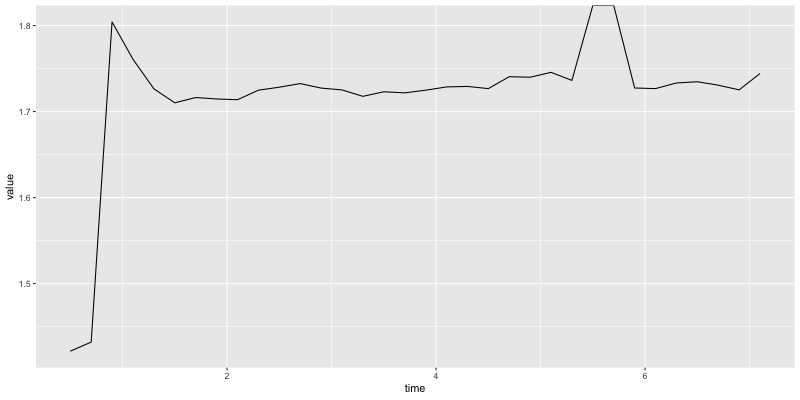

RObject{VecSxp}


In [111]:
rplot(result[1].percepts.sratio)

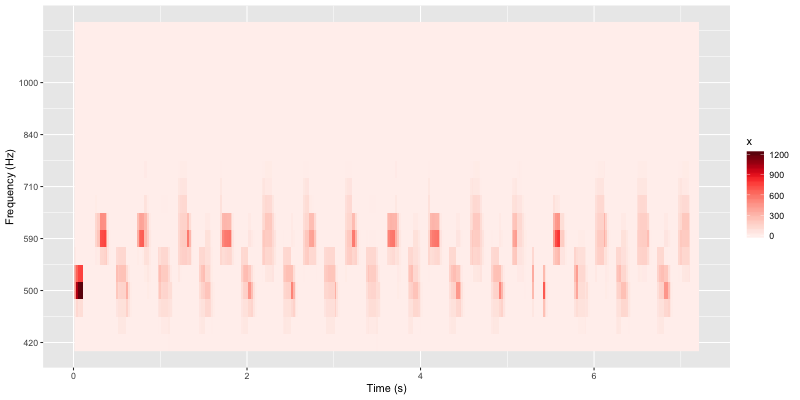

RObject{VecSxp}


In [112]:
rplot(result[2].primary_source)

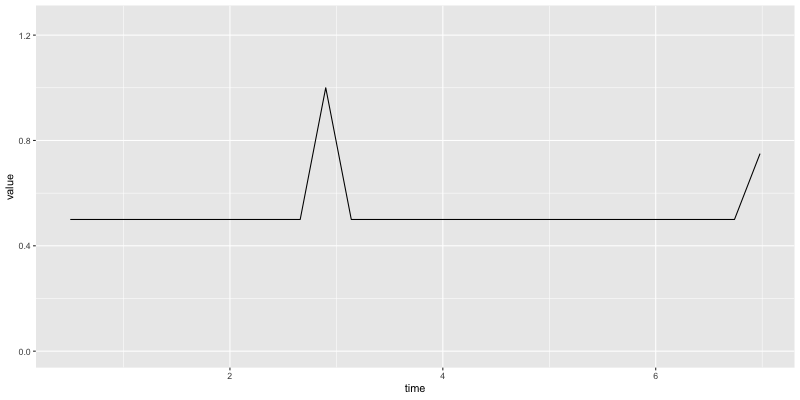

RObject{VecSxp}


In [113]:
p = rplot(result[2].percepts.bratio)
R"$p + ylim(0.0,1.25)"

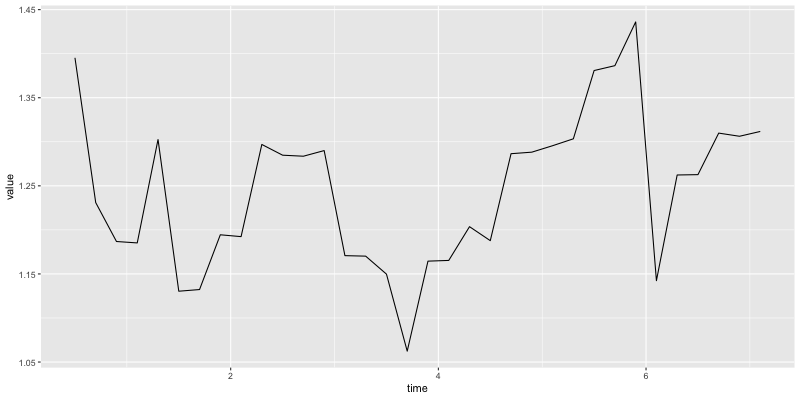

RObject{VecSxp}


In [114]:
rplot(result[2].percepts.sratio)

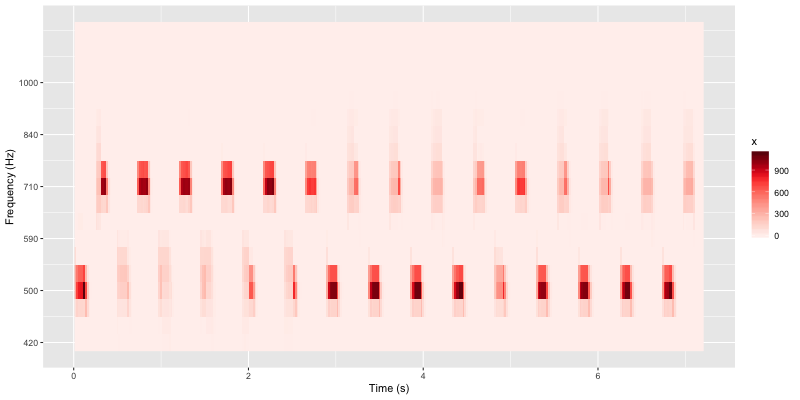

RObject{VecSxp}


In [115]:
rplot(result[3].primary_source)

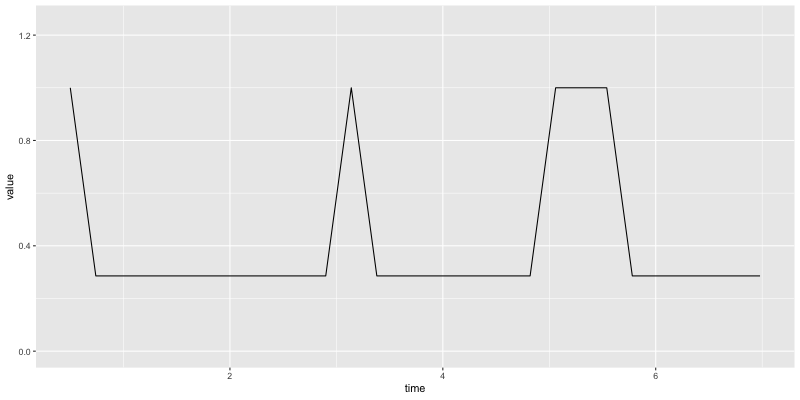

RObject{VecSxp}


In [116]:
p = rplot(result[3].percepts.bratio)
R"$p + ylim(0.0,1.25)"

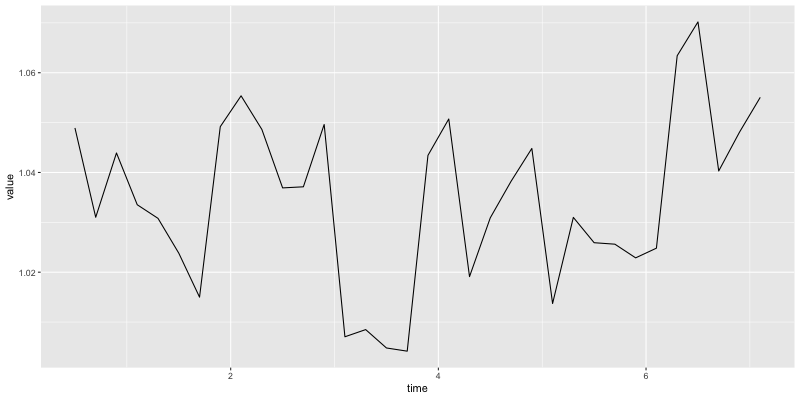

RObject{VecSxp}


In [117]:
rplot(result[3].percepts.sratio)

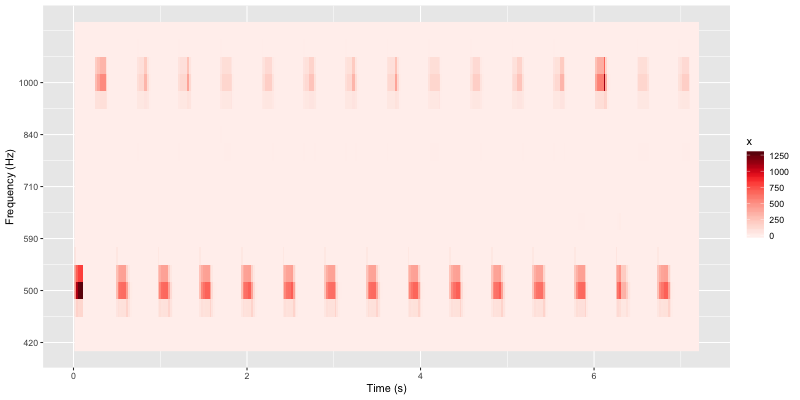

RObject{VecSxp}


In [118]:
rplot(result[4].primary_source)

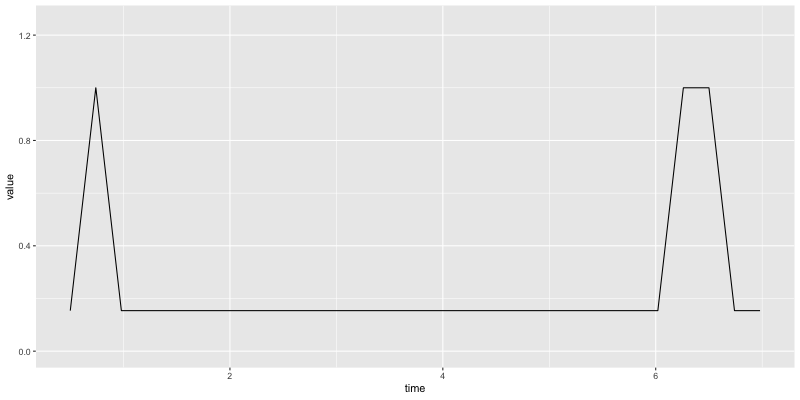

RObject{VecSxp}


In [119]:
p = rplot(result[4].percepts.bratio)
R"$p + ylim(0.0,1.25)"

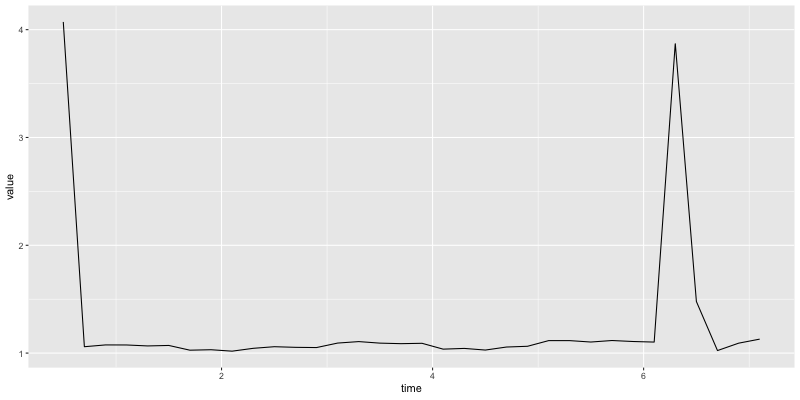

RObject{VecSxp}


In [120]:
rplot(result[4].percepts.sratio)

# longer run

In [43]:
result = []
for d in [1,3,6,12]
    @show d
    params[:Δf] = d
    push!(result,@time(bistable_model(100,params,joinpath(srcdir,"settings.toml"),progressbar=false,
                                      intermediate_results=true)))
end

alert()

d = 1
  6.952751 seconds (31.56 M allocations: 4.990 GiB, 16.40% gc time)
d = 3


┌ Info: 1.46% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


  7.214518 seconds (31.58 M allocations: 4.990 GiB, 16.98% gc time)
d = 6


┌ Info: 1.25% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


  7.241150 seconds (31.58 M allocations: 4.990 GiB, 15.19% gc time)
d = 12


┌ Info: 1.25% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


  7.183187 seconds (31.58 M allocations: 4.990 GiB, 16.97% gc time)


Process(`osascript -e 'display notification "Done!" with title "Julia"'`, ProcessExited(0))

In [45]:
length(result[1].primary_source)*sizeof(eltype(result[1].primary_source))

356.25

In [47]:
length(result[1].primary_source)*sizeof(UInt8)/1024

44.53125

In [54]:
sum(result[1].primary_source .> 1.0) / length(result[1].primary_source)

0.28671052631578947

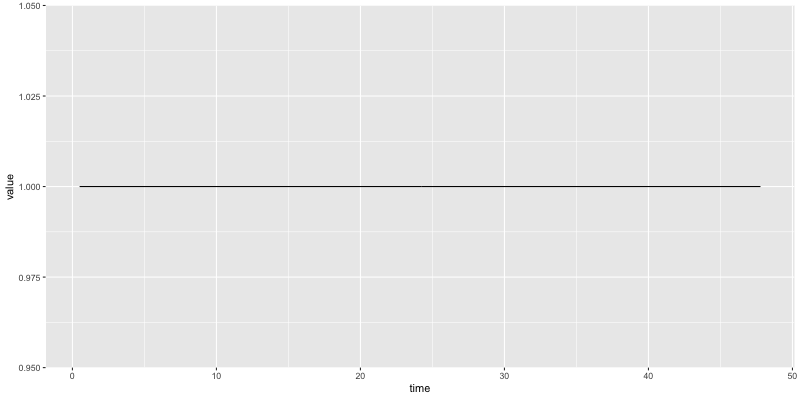

RObject{VecSxp}


In [6]:
rplot(result[1].percepts.bratio)

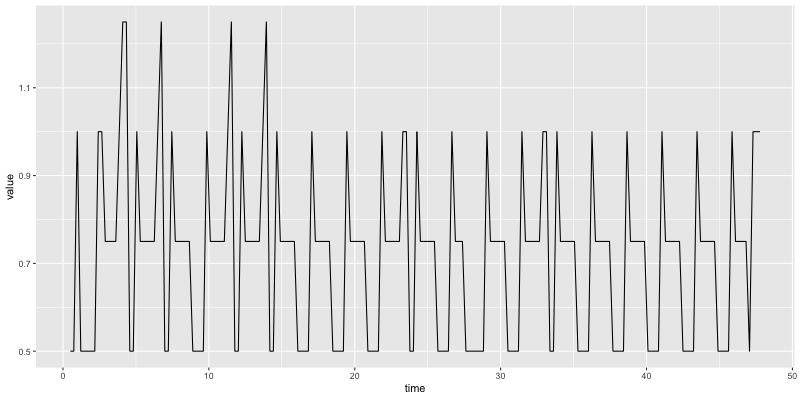

RObject{VecSxp}


In [7]:
rplot(result[2].percepts.bratio)

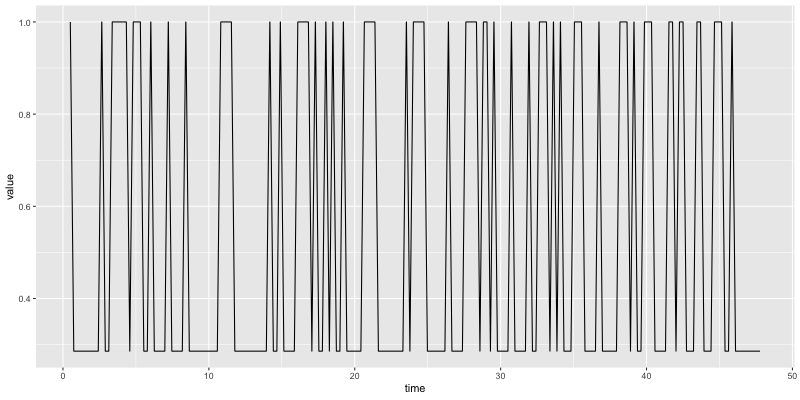

RObject{VecSxp}


In [8]:
rplot(result[3].percepts.bratio)

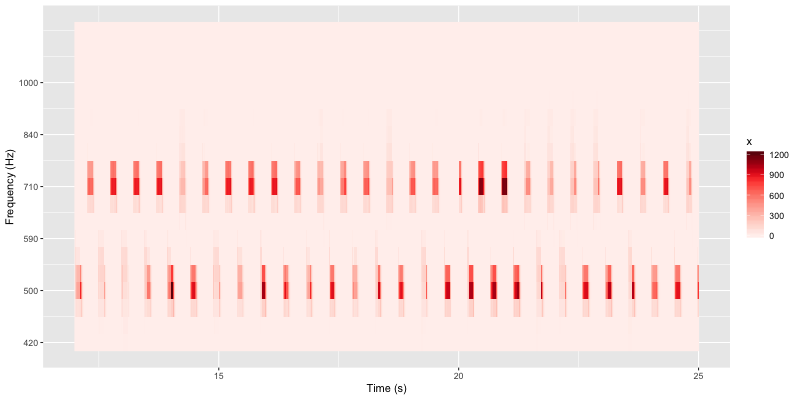

RObject{VecSxp}


In [9]:
rplot(result[3].primary_source[12s .. 25s])

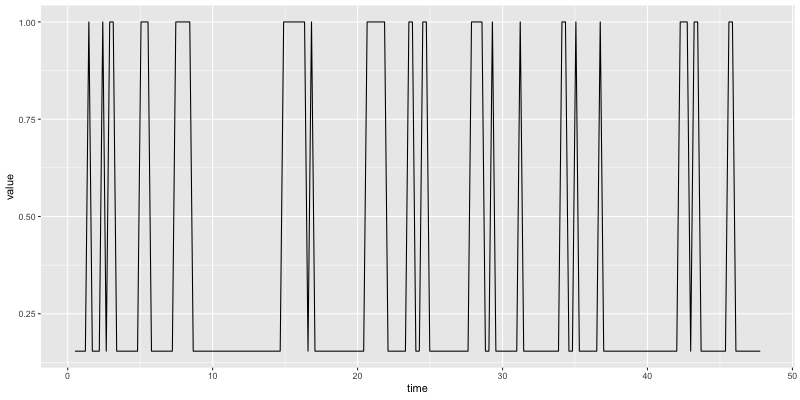

RObject{VecSxp}


In [10]:
rplot(result[4].percepts.bratio)

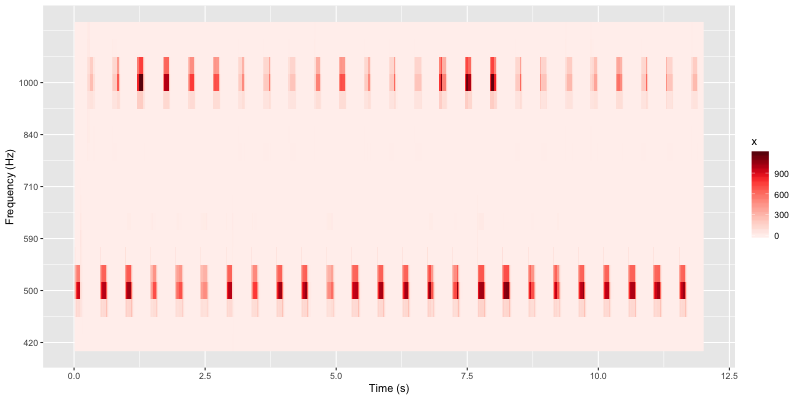

RObject{VecSxp}


In [11]:
rplot(result[4].primary_source[0s .. 12s])

# thoughts

This seems to be essentially working at this point, with the bratio reports being consistent with the spectrums. The sratio value is essentially useless (I believe becuase of the normalization).

There is a small question of whether the competition setup between all *three* different hyperparameters is appropriate, and whether we should vary all three. (Maybe we can get away with 1 or 2). 

However, before I answer these questions I want to get a sense of how well this works across all three types of models.

# Freq-level Bistability

In [12]:
paramfile = joinpath("..","data","count_lengths","run_2018-09-12",
                     "individual_extremes_params.feather")
params = getparams(paramfile) do i,row
  abs(row[:f_c_m] - 100) < 1 &&
  abs(row[:f_c_a] - 5) < 1 &&
  row[:Δf] == 12
end

params[:t_W_m_σ_t] = 7.0
params[:t_W_m_σ_ϕ] = 7.0
params[:t_W_m_c] = 4.0

# just a guess for now, think through this, and the specific inhibition function
# later, if using N works out
params[:W_m_σ_N] = 3

3

In [15]:
result = []
for d in [1,3,6,12]
    @show d
    params[:Δf] = d
    push!(result,bistable_model(15,params,joinpath(srcdir,"settings.toml"),progressbar=false,
                                intermediate_results=true))
end

alert()

d = 1
d = 3
d = 6
d = 12


Process(`osascript -e 'display notification "Done!" with title "Julia"'`, ProcessExited(0))

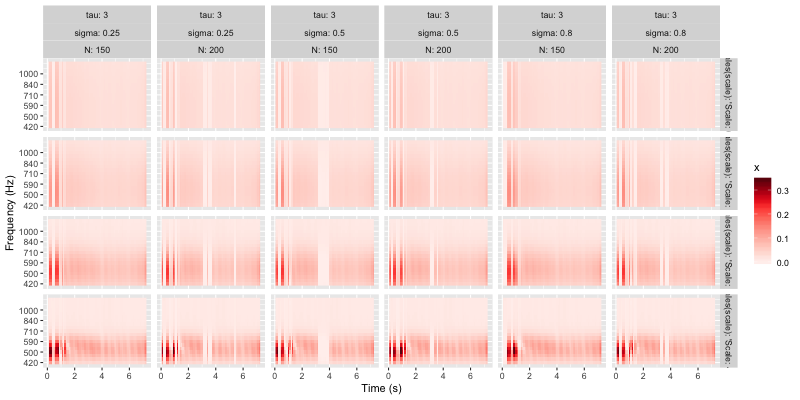

RObject{VecSxp}


In [275]:
rplot(result[1].sources.tracks)

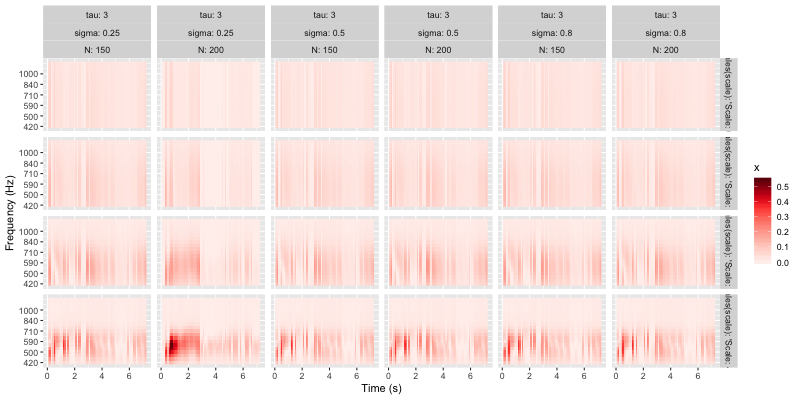

RObject{VecSxp}


In [276]:
rplot(result[2].sources.tracks)

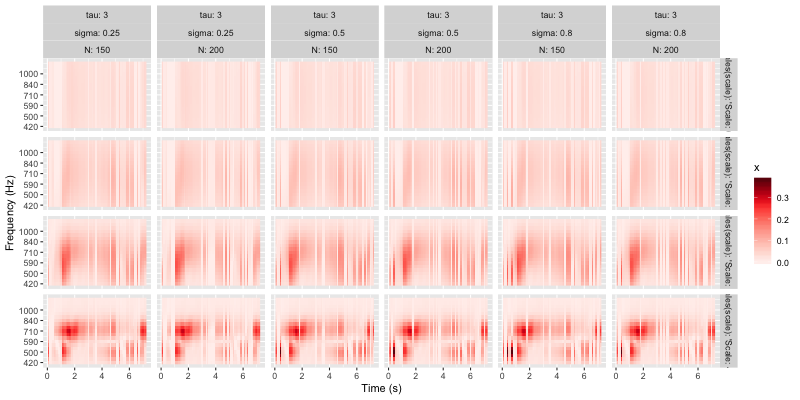

RObject{VecSxp}


In [277]:
rplot(result[3].sources.tracks)

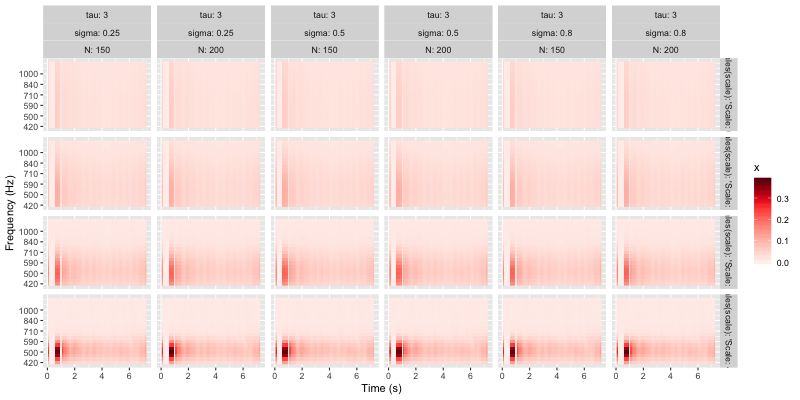

RObject{VecSxp}


In [278]:
rplot(result[4].sources.tracks)

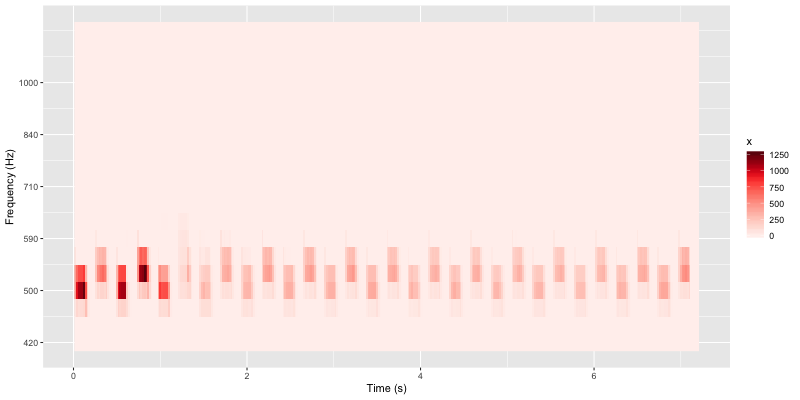

RObject{VecSxp}


In [279]:
rplot(result[1].primary_source)

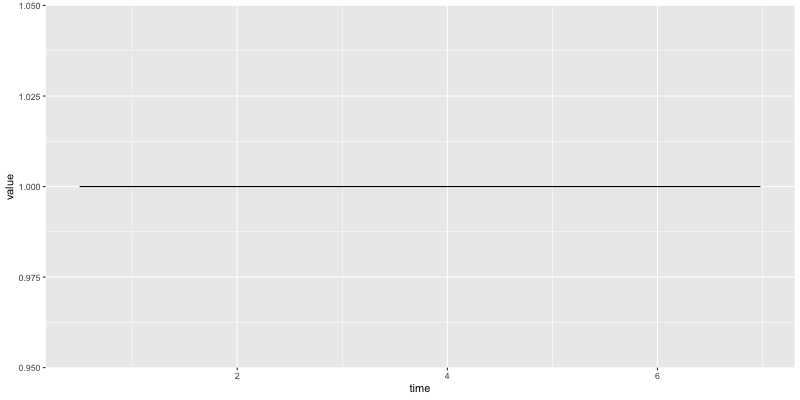

RObject{VecSxp}


In [16]:
rplot(result[1].percepts.bratio)

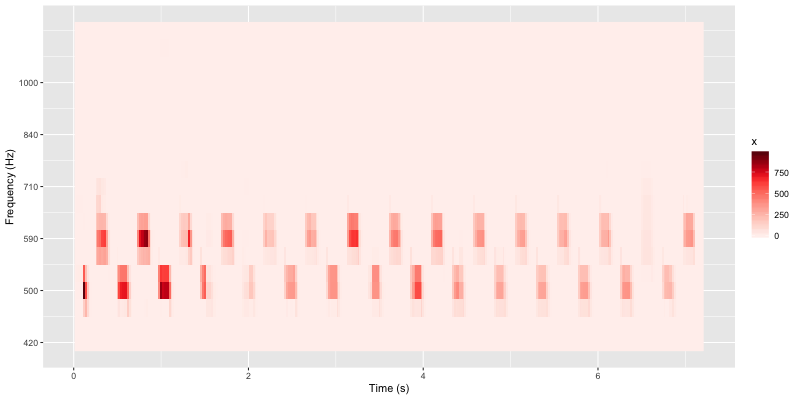

RObject{VecSxp}


In [17]:
rplot(result[2].primary_source)

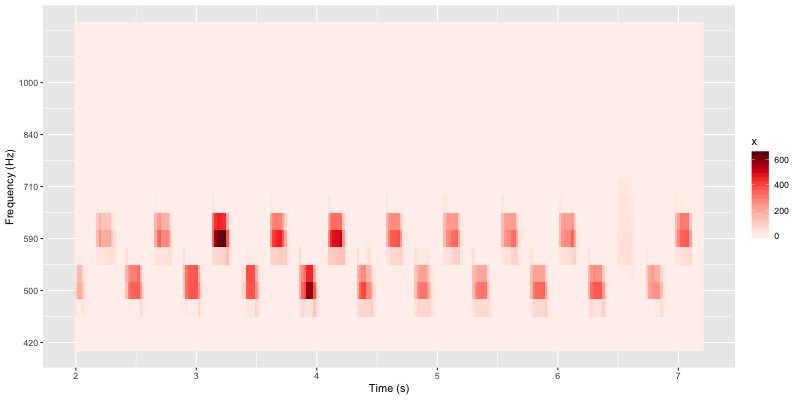

RObject{VecSxp}


In [18]:
rplot(result[2].primary_source[2s .. 8s])

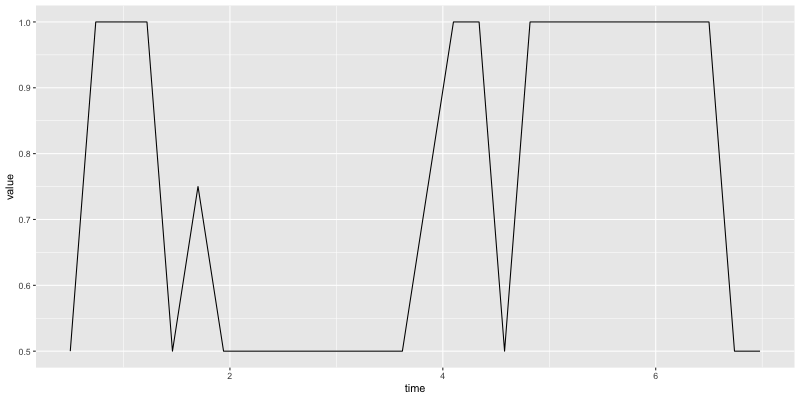

RObject{VecSxp}


In [19]:
rplot(result[2].percepts.bratio)

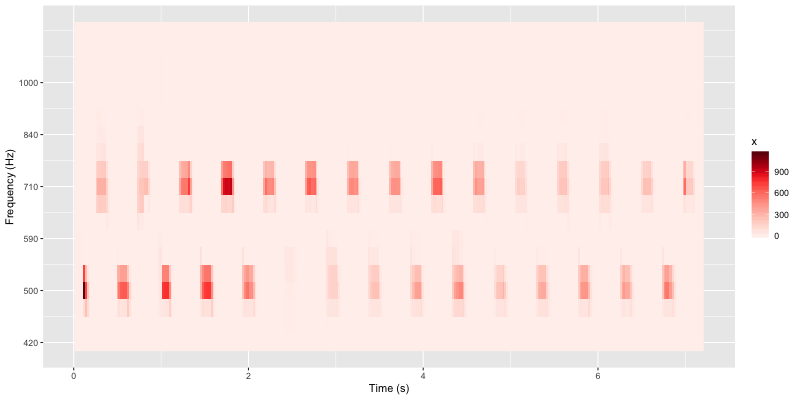

RObject{VecSxp}


In [20]:
rplot(result[3].primary_source)

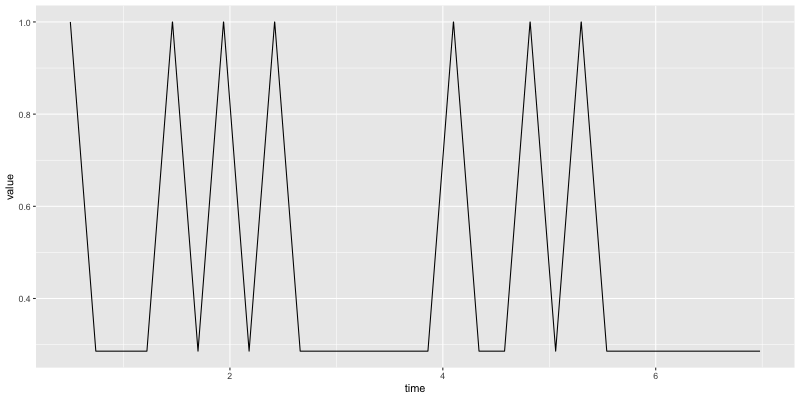

RObject{VecSxp}


In [21]:
rplot(result[3].percepts.bratio)

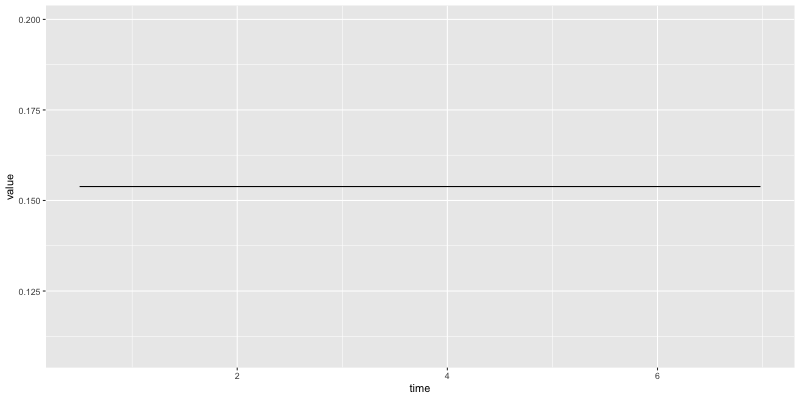

RObject{VecSxp}


In [22]:
rplot(result[4].percepts.bratio)

In [25]:
result = []
for d in [3,6,12]
    @show d
    params[:Δf] = d
    push!(result,@time bistable_model(100,params,joinpath(srcdir,"settings.toml"),progressbar=false,
                                      intermediate_results=true))
end

alert()

d = 3
  6.308450 seconds (29.22 M allocations: 4.865 GiB, 17.41% gc time)
d = 6
  6.278113 seconds (29.22 M allocations: 4.865 GiB, 18.37% gc time)
d = 12
  6.193256 seconds (29.22 M allocations: 4.865 GiB, 18.31% gc time)


Process(`osascript -e 'display notification "Done!" with title "Julia"'`, ProcessExited(0))

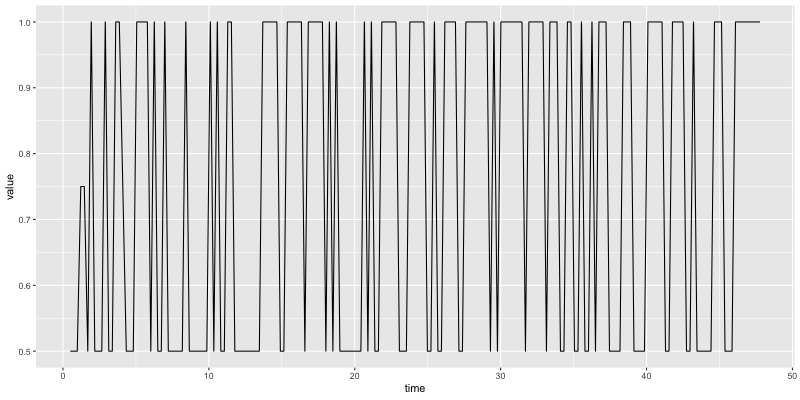

RObject{VecSxp}


In [26]:
rplot(result[1].percepts.bratio)

# NOTE

although the above 'looks' bistable, it is worth noting that the lowest value is 0.5: it is quite possible the threhsold should be below this value (so all responses would be classified as one-stream responses). importatingly, this interpretation is reassuringly consistent with the `primary_source` mask output for the 3st condition (further up in this document)

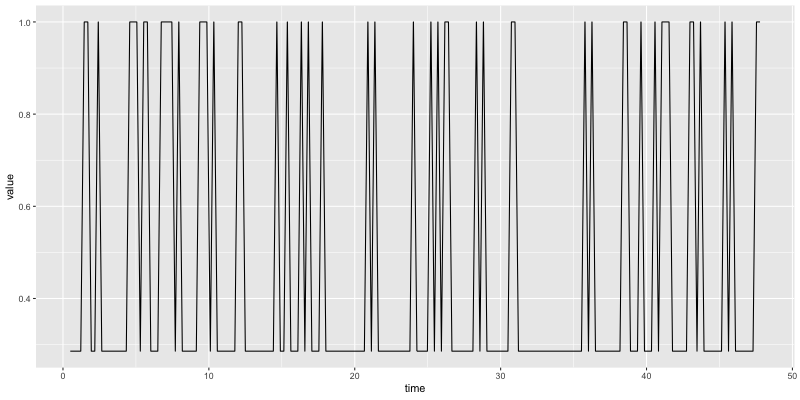

RObject{VecSxp}


In [27]:
rplot(result[2].percepts.bratio)

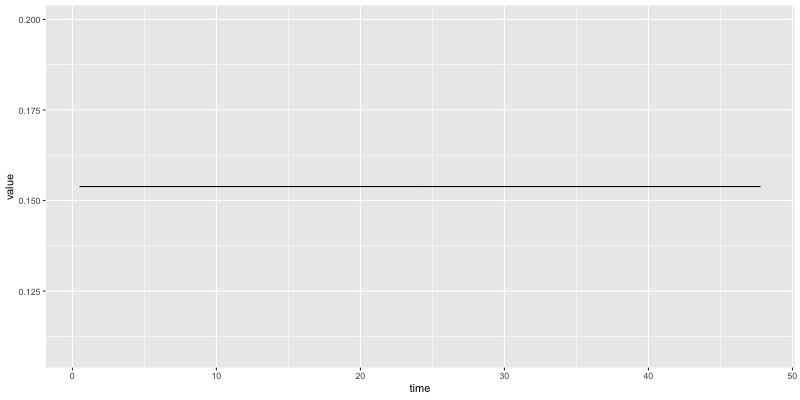

RObject{VecSxp}


In [28]:
rplot(result[3].percepts.bratio)

# Scale-level Bistability 

In [29]:
paramfile = joinpath("..","data","count_lengths","run_2018-09-12",
                     "individual_extremes_params.feather")
params = getparams(paramfile) do i,row
  abs(row[:s_c_m] - 100) < 1 &&
  abs(row[:s_c_a] - 5) < 1 &&
  row[:Δf] == 12
end

params[:s_c_a] = 25
params[:t_W_m_σ_t] = 7.0
params[:t_W_m_σ_ϕ] = 7.0
params[:t_W_m_c] = 4.0

# just a guess for now, think through this, and the specific inhibition function
# later, if using N works out
params[:W_m_σ_N] = 3

3

In [32]:
result = []
for d in [1,3,6,12]
    @show d
    params[:Δf] = d
    push!(result,@time bistable_model(50,params,joinpath(srcdir,"settings.toml"),progressbar=false,
                                      intermediate_results=true))
end

alert()

d = 1
  5.984561 seconds (22.45 M allocations: 2.796 GiB, 10.92% gc time)
d = 3


┌ Info: 1.25% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


  3.526628 seconds (15.35 M allocations: 2.453 GiB, 18.01% gc time)
d = 6


┌ Info: 0.42% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


  3.494641 seconds (15.35 M allocations: 2.453 GiB, 16.36% gc time)
d = 12


┌ Info: 0.42% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


  3.355094 seconds (15.36 M allocations: 2.452 GiB, 13.14% gc time)


Process(`osascript -e 'display notification "Done!" with title "Julia"'`, ProcessExited(0))

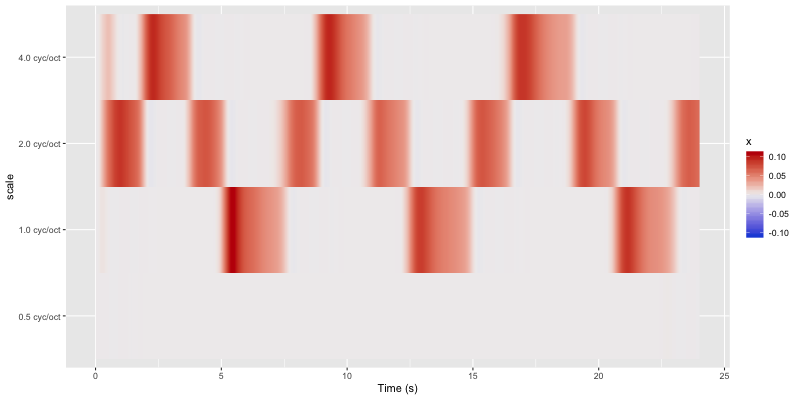

RObject{VecSxp}


In [33]:
rplot(result[1].cortical.outweights)

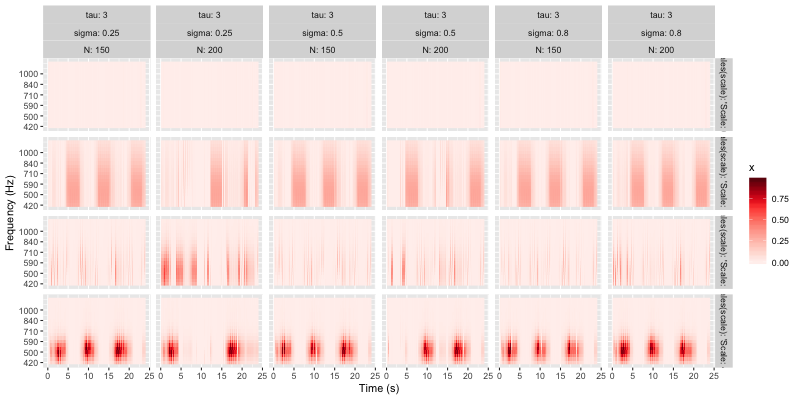

RObject{VecSxp}


In [34]:
rplot(result[1].sources.tracks)

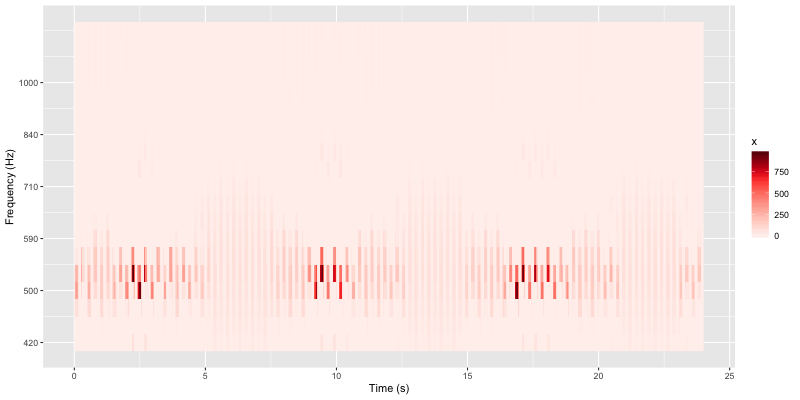

RObject{VecSxp}


In [35]:
rplot(result[1].primary_source)

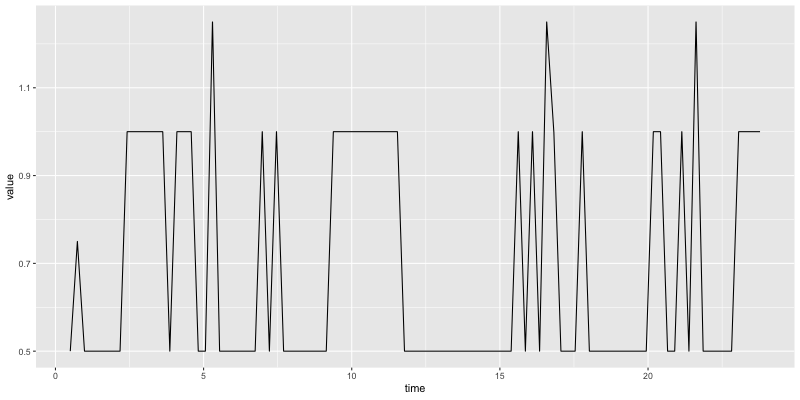

RObject{VecSxp}


In [37]:
rplot(result[2].percepts.bratio)

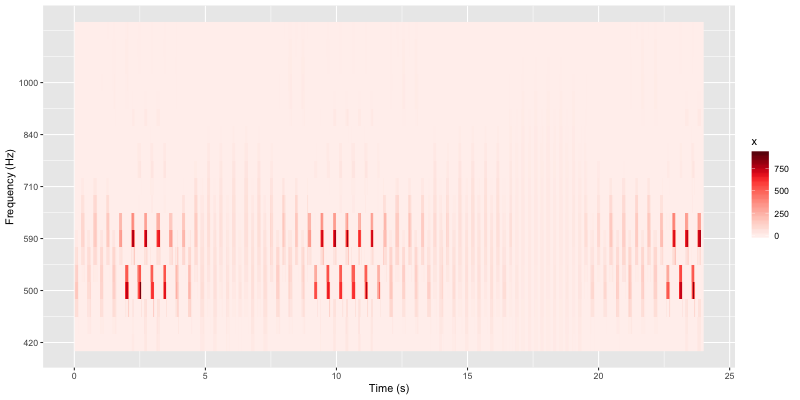

RObject{VecSxp}


In [38]:
rplot(result[2].primary_source)

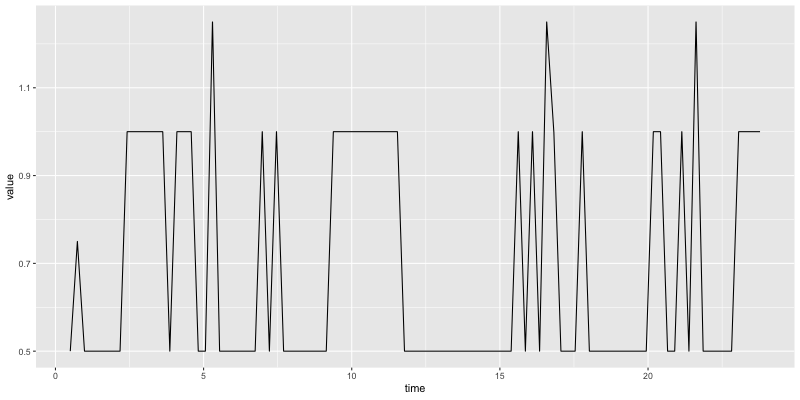

RObject{VecSxp}


In [39]:
rplot(result[2].percepts.bratio)

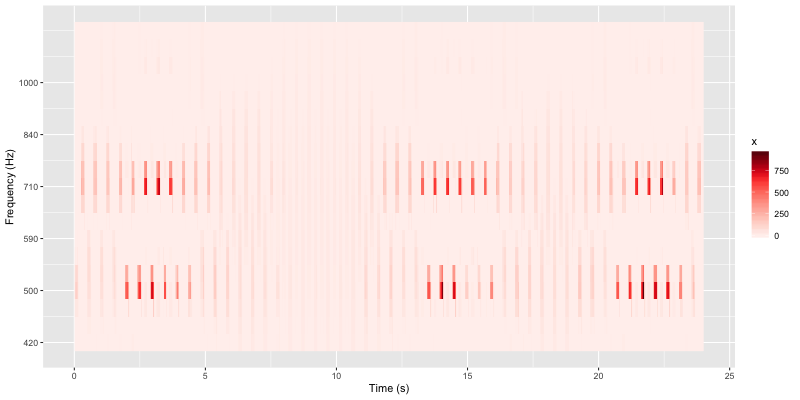

RObject{VecSxp}


In [298]:
rplot(result[3].primary_source)

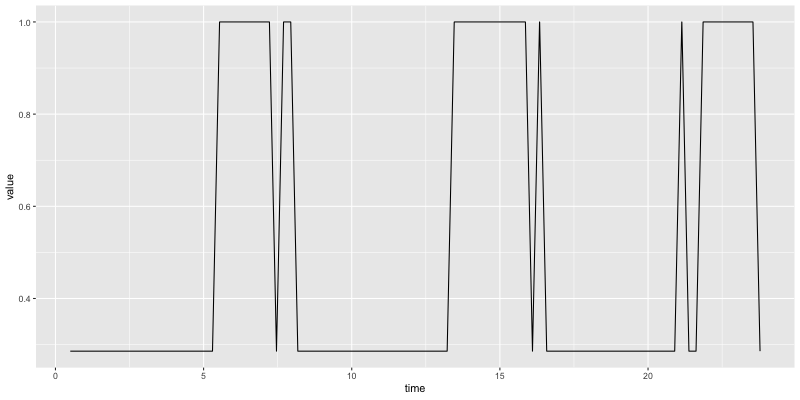

RObject{VecSxp}


In [40]:
rplot(result[3].percepts.bratio)

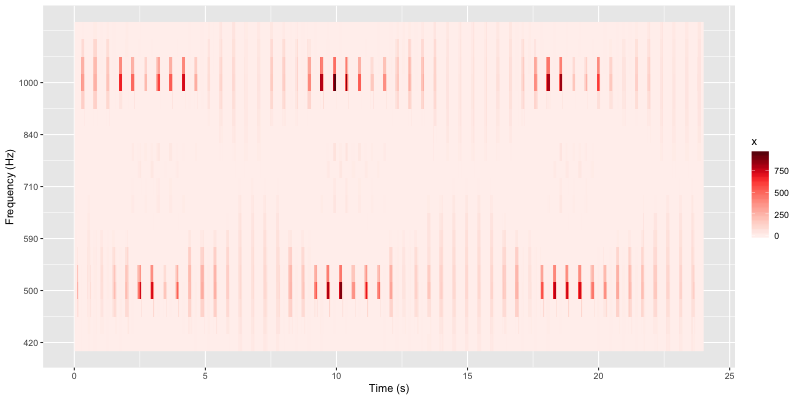

RObject{VecSxp}


In [41]:
rplot(result[4].primary_source)

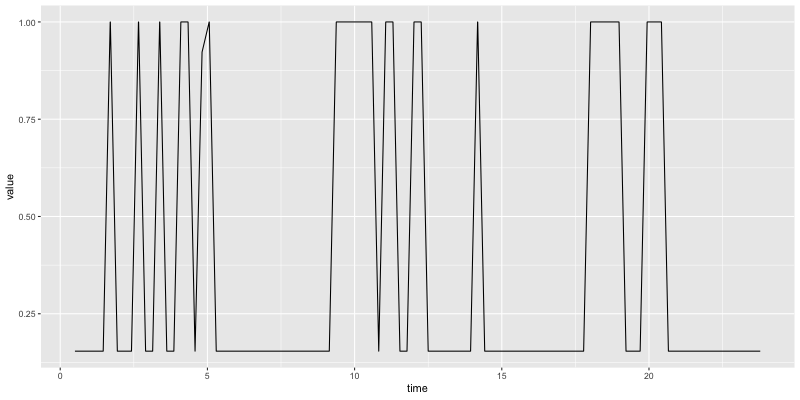

RObject{VecSxp}


In [42]:
rplot(result[4].percepts.bratio)